In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import cv2

In [34]:
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=False, validation_split=0.2)

In [4]:
x_train = datagen.flow_from_directory(r'C:\Users\spdpr\Downloads\flowers', target_size=(64,64),batch_size=32, class_mode='categorical', subset='training')

Found 3457 images belonging to 5 classes.


In [59]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [60]:
classes = x_train.class_indices.keys()

In [5]:
x_val = datagen.flow_from_directory(r'C:\Users\spdpr\Downloads\flowers', target_size=(64,64),batch_size=32, class_mode='categorical', subset='validation')

Found 860 images belonging to 5 classes.


In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import MaxPooling2D,Dense,Flatten,Convolution2D

In [16]:
model = Sequential()

In [17]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(units=300, kernel_initializer='random_uniform', activation='relu'))

In [23]:
model.add(Dense(units=200, kernel_initializer='random_uniform', activation='relu'))

In [24]:
model.add(Dense(units=5,kernel_initializer='random_uniform',activation='softmax'))

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

In [27]:
model.fit_generator(x_train,steps_per_epoch=40,epochs=25,validation_data=x_val,validation_steps=10)

c:\users\spdpr\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
40/40 [==============================] - 17s 380ms/step - loss: 1.5273 - accuracy: 0.2778 - val_loss: 1.3131 - val_accuracy: 0.3938
Epoch 2/25
40/40 [==============================] - 14s 344ms/step - loss: 1.2867 - accuracy: 0.4019 - val_loss: 1.2508 - val_accuracy: 0.3938
Epoch 3/25
40/40 [==============================] - 14s 349ms/step - loss: 1.2319 - accuracy: 0.4516 - val_loss: 1.1553 - val_accuracy: 0.4969
Epoch 4/25
40/40 [==============================] - 14s 342ms/step - loss: 1.1691 - accuracy: 0.5004 - val_loss: 1.1993 - val_accuracy: 0.4688
Epoch 5/25
40/40 [==============================] - 14s 342ms/step - loss: 1.1010 - accuracy: 0.5547 - val_loss: 1.0948 - val_accuracy: 0.5312
Epoch 6/25
40/40 [==============================] - 14s 339ms/step - loss: 1.0307 - accuracy: 0.5867 - val_loss: 1.0939 - val_accuracy: 0.5813
Epoch 7/25
40/40 [==============================] - 12s 308ms/step - loss: 0.9989 - accuracy: 0.6031 - val_loss: 1.0756 - val_accuracy: 0.5188

In [49]:
test_img = image.load_img(r"C:\Users\spdpr\Downloads\red-rose-with-green-leaf_43623-944.jpg", target_size=(64,64,3))

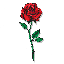

In [50]:
test_img

In [51]:
test_img = image.img_to_array(test_img)

In [52]:
test_img = np.expand_dims(test_img,axis=0)

In [53]:
test_img.shape

(1, 64, 64, 3)

In [68]:
pred = model.predict(test_img)[0]

1/1 [==============================] - 0s 19ms/step


In [72]:
for i in range(len(pred)):
    if pred[i]==1:
        print('The type of flower is: ',classes[i])

The type of flower is:  rose


In [71]:
classes = list(classes)

In [73]:
model.save("flower_classifier.h5")

In [74]:
from tensorflow import keras

In [75]:
model = keras.models.load_model("flower_classifier.h5")

In [76]:
model.predict(test_img)

1/1 [==============================] - 0s 66ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)